In [2]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df_sueldos = pd.read_csv("sueldos_del_2012_en_adelante.csv")

# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
print(df_sueldos.head())


  CUIL   AÑO MES                              NOMBRE              DESC_REP  \
0  NaN  2012   1                     MACRI, MAURICIO      JEFE DE GOBIERNO   
1  NaN  2012   1                VIDAL, MARIA EUGENIA  VICEJEFA DE GOBIERNO   
2  NaN  2012   1  RODRIGUEZ LARRETA, HORACIO ANTONIO      JEFE DE GABINETE   
3  NaN  2012   1           GRINDETTI, NESTOR OSVALDO              MINISTRO   
4  NaN  2012   1              BULLRICH, ESTEBAN JOSE              MINISTRO   

  ASIGNACION    BRUTO OBSERVACIONES  
0     6300.0   5210.1           NaN  
1    52226.1  29346.8           NaN  
2    25080.0  13857.0           NaN  
3    25080.0  16054.0           NaN  
4    25080.0  15189.4           NaN  


In [3]:
# Limpiar los datos en las columnas 'ASIGNACION' y 'BRUTO'
df_sueldos['ASIGNACION'] = df_sueldos['ASIGNACION'].str.replace('$', '').str.replace(',', '.').fillna(0).astype(float)
df_sueldos['BRUTO'] = df_sueldos['BRUTO'].str.replace('$', '').str.replace(',', '.').fillna(0).astype(float)


In [4]:
# Reemplazar 'SETIEMBRE' por '9' en la columna 'MES'
df_sueldos['MES'] = df_sueldos['MES'].replace('SETIEMBRE', '9')


In [5]:
df_sueldos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CUIL           2042 non-null   object 
 1   AÑO            3883 non-null   int64  
 2   MES            3883 non-null   object 
 3   NOMBRE         3883 non-null   object 
 4   DESC_REP       3883 non-null   object 
 5   ASIGNACION     3883 non-null   float64
 6   BRUTO          3883 non-null   float64
 7   OBSERVACIONES  117 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 242.8+ KB


In [9]:
# Leer el archivo CSV en un DataFrame
df_dolar = pd.read_csv('dolarxmes.csv')

# Reemplazar el nombre de la columna 'valor' por 'dolar'
df_dolar = df_dolar.rename(columns={'valor': 'dolar'})

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df_dolar.head())


    año  mes  dolar
0  2012    1      4
1  2012    2      4
2  2012    3      4
3  2012    4      4
4  2012    5      4


In [13]:
# Convertir las columnas 'MES' y 'AÑO' del DataFrame df_sueldos en enteros
df_sueldos['MES'] = df_sueldos['MES'].astype(int)
df_sueldos['AÑO'] = df_sueldos['AÑO'].astype(int)

# Convertir las columnas 'año' y 'mes' del DataFrame df_dolar en enteros
df_dolar['año'] = df_dolar['año'].astype(int)
df_dolar['mes'] = df_dolar['mes'].astype(int)


In [14]:
# Combinar los DataFrames df_sueldos y df_dolar en función de las columnas 'AÑO' y 'MES'
df_sueldos_con_dolar = pd.merge(df_sueldos, df_dolar, left_on=['AÑO', 'MES'], right_on=['año', 'mes'], how='left')

# Eliminar las columnas 'año' y 'mes' (opcional, si se desean eliminar)
df_sueldos_con_dolar = df_sueldos_con_dolar.drop(columns=['año', 'mes'])

# Mostrar las primeras filas del DataFrame resultante
print(df_sueldos_con_dolar.head())


  CUIL   AÑO  MES                              NOMBRE              DESC_REP  \
0  NaN  2012    1                     MACRI, MAURICIO      JEFE DE GOBIERNO   
1  NaN  2012    1                VIDAL, MARIA EUGENIA  VICEJEFA DE GOBIERNO   
2  NaN  2012    1  RODRIGUEZ LARRETA, HORACIO ANTONIO      JEFE DE GABINETE   
3  NaN  2012    1           GRINDETTI, NESTOR OSVALDO              MINISTRO   
4  NaN  2012    1              BULLRICH, ESTEBAN JOSE              MINISTRO   

   ASIGNACION    BRUTO OBSERVACIONES  dolar  
0      6300.0   5210.1           NaN      4  
1     52226.1  29346.8           NaN      4  
2     25080.0  13857.0           NaN      4  
3     25080.0  16054.0           NaN      4  
4     25080.0  15189.4           NaN      4  


In [20]:
df_sueldos_con_dolar.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CUIL           2042 non-null   object 
 1   AÑO            3883 non-null   int64  
 2   MES            3883 non-null   int64  
 3   NOMBRE         3883 non-null   object 
 4   DESC_REP       3883 non-null   object 
 5   ASIGNACION     3883 non-null   float64
 6   BRUTO          3883 non-null   float64
 7   OBSERVACIONES  117 non-null    object 
 8   dolar          3883 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 273.1+ KB


In [21]:
# Calcular las columnas 'dolarAsignacion' y 'dolarBruto' en df_sueldos_con_dolar
df_sueldos_con_dolar['dolarAsignacion'] = df_sueldos_con_dolar['ASIGNACION'] / df_sueldos_con_dolar['dolar']
df_sueldos_con_dolar['dolarBruto'] = df_sueldos_con_dolar['BRUTO'] / df_sueldos_con_dolar['dolar']

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df_sueldos_con_dolar.head())


  CUIL   AÑO  MES                              NOMBRE              DESC_REP  \
0  NaN  2012    1                     MACRI, MAURICIO      JEFE DE GOBIERNO   
1  NaN  2012    1                VIDAL, MARIA EUGENIA  VICEJEFA DE GOBIERNO   
2  NaN  2012    1  RODRIGUEZ LARRETA, HORACIO ANTONIO      JEFE DE GABINETE   
3  NaN  2012    1           GRINDETTI, NESTOR OSVALDO              MINISTRO   
4  NaN  2012    1              BULLRICH, ESTEBAN JOSE              MINISTRO   

   ASIGNACION    BRUTO OBSERVACIONES  dolar  dolarAsignacion  dolarBruto  
0      6300.0   5210.1           NaN      4         1575.000    1302.525  
1     52226.1  29346.8           NaN      4        13056.525    7336.700  
2     25080.0  13857.0           NaN      4         6270.000    3464.250  
3     25080.0  16054.0           NaN      4         6270.000    4013.500  
4     25080.0  15189.4           NaN      4         6270.000    3797.350  


In [22]:
df_sueldos = df_sueldos_con_dolar

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


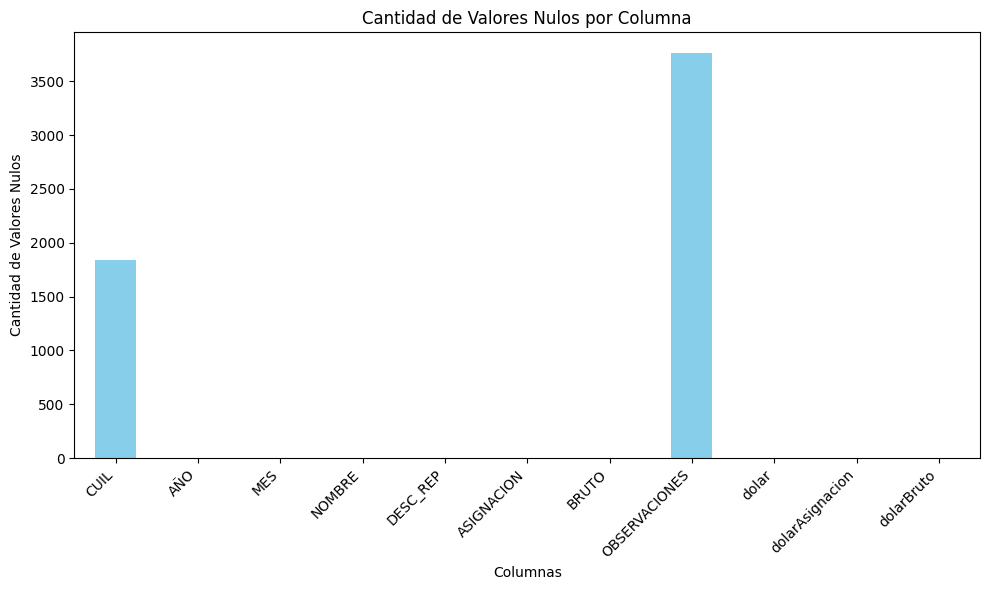

In [24]:


# Calcular la cantidad de valores nulos por columna
valores_nulos_por_columna = df_sueldos.isnull().sum()

# Crear un gráfico de barras para visualizar los valores nulos
plt.figure(figsize=(10, 6))
valores_nulos_por_columna.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


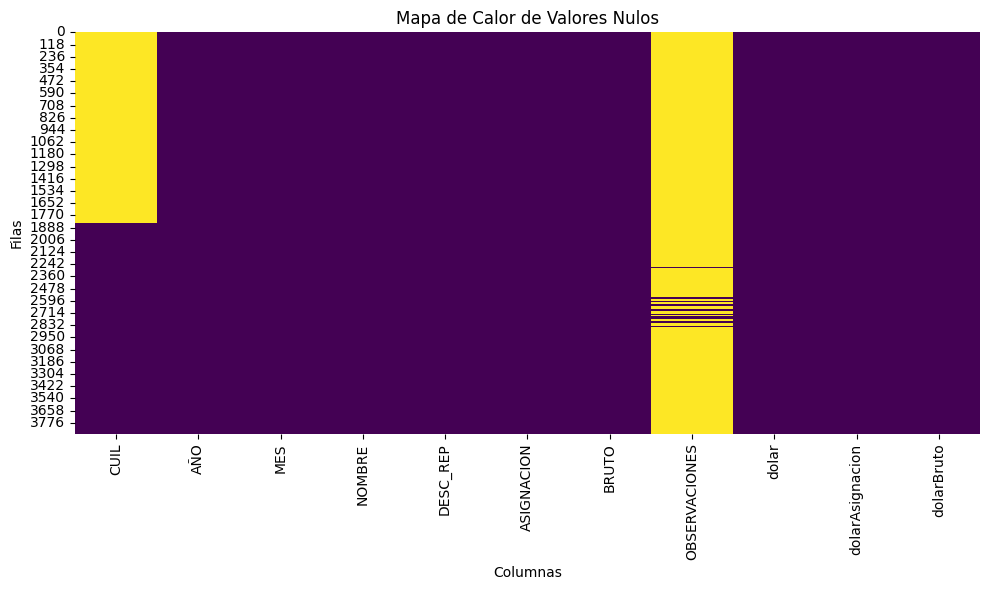

In [25]:
# Crear un mapa de calor de los valores nulos
plt.figure(figsize=(10, 6))
sns.heatmap(df_sueldos.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de Calor de Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.tight_layout()
plt.show()


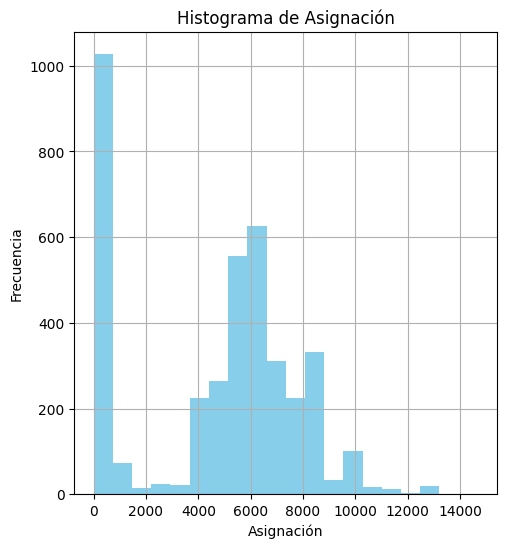

In [26]:
# Histogramas de 'ASIGNACION' y 'BRUTO'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_sueldos['dolarAsignacion'], bins=20, color='skyblue')
plt.title('Histograma de Asignación')
plt.xlabel('Asignación')
plt.ylabel('Frecuencia')
plt.grid(True)

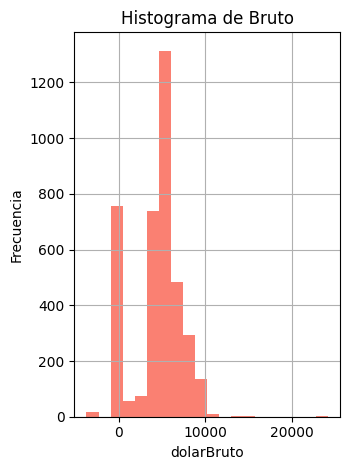

In [28]:

plt.subplot(1, 2, 2)
plt.hist(df_sueldos['dolarBruto'], bins=20, color='salmon')
plt.title('Histograma de Bruto')
plt.xlabel('dolarBruto')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.tight_layout()
plt.show()

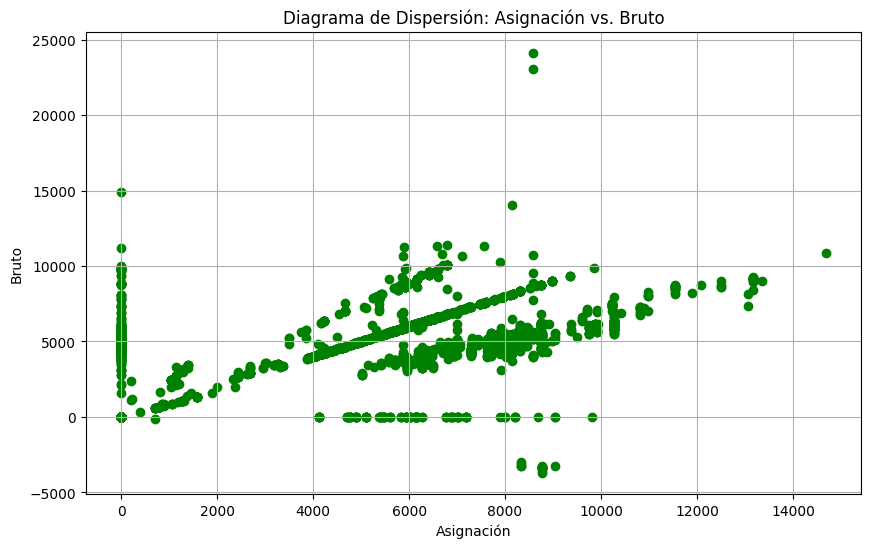

In [29]:
# Diagrama de dispersión de 'ASIGNACION' vs. 'BRUTO'
plt.figure(figsize=(10, 6))
plt.scatter(df_sueldos['dolarAsignacion'], df_sueldos['dolarBruto'], color='green')
plt.title('Diagrama de Dispersión: Asignación vs. Bruto')
plt.xlabel('Asignación')
plt.ylabel('Bruto')
plt.grid(True)
plt.show()

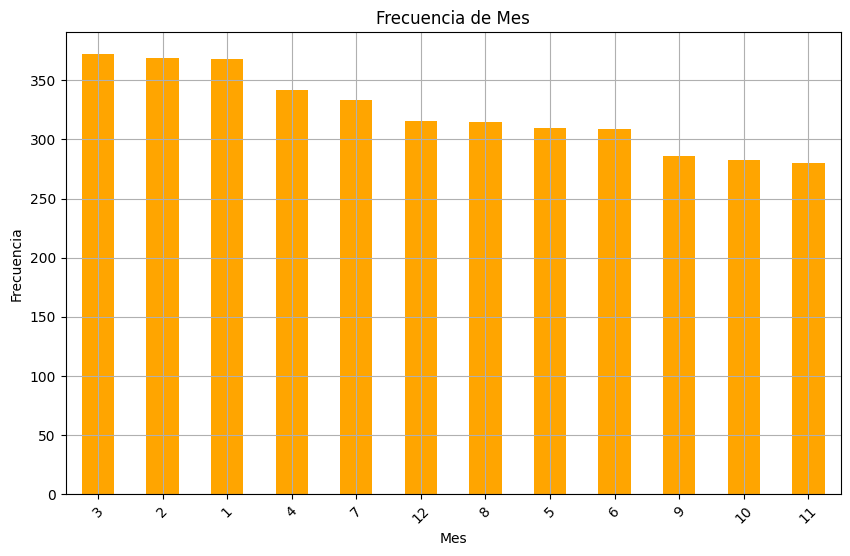

In [30]:
# Gráfico de barras de frecuencia de 'MES'
plt.figure(figsize=(10, 6))
df_sueldos['MES'].value_counts().plot(kind='bar', color='orange')
plt.title('Frecuencia de Mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/tmp/ipykernel_3802/194990858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AÑO', y='dolarAsignacion', data=df_sueldos, palette='Set2')
/tmp/ipykernel_3802/194990858.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AÑO', y='dolarBruto', data=df_sueldos, palette='Set2')


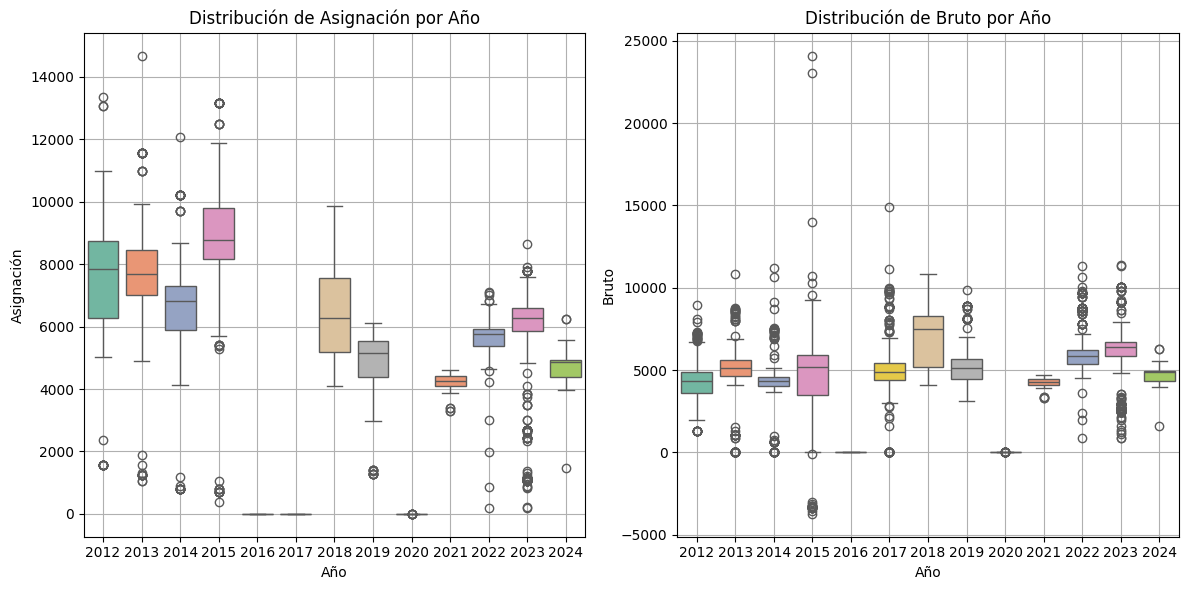

In [33]:
# Diagrama de caja de 'ASIGNACION' y 'BRUTO' por 'AÑO'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='AÑO', y='dolarAsignacion', data=df_sueldos, palette='Set2')
plt.title('Distribución de Asignación por Año')
plt.xlabel('Año')
plt.ylabel('Asignación')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(x='AÑO', y='dolarBruto', data=df_sueldos, palette='Set2')
plt.title('Distribución de Bruto por Año')
plt.xlabel('Año')
plt.ylabel('Bruto')
plt.grid(True)

plt.tight_layout()
plt.show()


In [34]:
# Guardar el DataFrame df_sueldos_con_dolar en un archivo CSV llamado datossueldos.csv
df_sueldos_con_dolar.to_csv('datossueldos.csv', index=False)

# Confirmar que se ha guardado correctamente
print("El archivo datossueldos.csv se ha guardado correctamente.")


El archivo datossueldos.csv se ha guardado correctamente.
